<a href="https://colab.research.google.com/github/BrianBaik/MessageClassifier/blob/brian-dev/Sungmin_Baik_MesageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import math
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
#Question 1
#Load the data
df = pd.read_csv("https://raw.githubusercontent.com/sziccardi/CSCI4521_DataRepository/refs/heads/main/sms_spam_cleaned.csv")

In [ ]:
#Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
vectorized_docs = vectorizer.fit_transform(df['msg'])
vectorizer.get_feature_names_out()

array(['00', '008704050406', '0089', ..., 'èn', 'ú1', '〨ud'], dtype=object)

In [ ]:
print(vectorized_docs)

  (0, 4055)	0.3510137503944799
  (0, 5531)	0.27705121191031057
  (0, 2168)	0.2713967139160779
  (0, 1208)	0.2620560291415027
  (0, 1629)	0.29623560594096615
  (0, 3386)	0.19376029641639878
  (0, 7919)	0.23680337334981716
  (0, 4173)	0.29623560594096615
  (0, 1627)	0.3349921702122839
  (0, 1901)	0.29623560594096615
  (0, 3351)	0.16509939692712014
  (0, 995)	0.3510137503944799
  (0, 7731)	0.1952657767379677
  (1, 5142)	0.27258784167390865
  (1, 4206)	0.4077088114561757
  (1, 4023)	0.5238449032113043
  (1, 7828)	0.4311704123079905
  (1, 5168)	0.5469442261896996
  (2, 3127)	0.11716719981506726
  (2, 2755)	0.36554166416294603
  (2, 7878)	0.1921857763326331
  (2, 2013)	0.1984296320418762
  (2, 7840)	0.14868515388263528
  (2, 2879)	0.47444001343000297
  (2, 2221)	0.20353123361898406
  :	:
  (5300, 5684)	0.19356181954673599
  (5300, 1907)	0.18488325945328699
  (5300, 7894)	0.18936819492550874
  (5300, 4920)	0.24627653259124047
  (5300, 440)	0.2315922466047057
  (5300, 7362)	0.24284655452420317

In [ ]:
#Binary Clustering (Use k = 2 for two clusters)
num_clusters = 2
km = KMeans(n_clusters=num_clusters, init='random', n_init=10, random_state=42, verbose=1)
km.fit(vectorized_docs)

Initialization complete
Iteration 0, inertia 10533.128510164353.
Iteration 1, inertia 5244.51032736567.
Iteration 2, inertia 5243.976657708643.
Iteration 3, inertia 5243.897688843196.
Iteration 4, inertia 5243.8596433165.
Iteration 5, inertia 5243.707975683468.
Iteration 6, inertia 5243.075997532654.
Iteration 7, inertia 5242.231371196193.
Iteration 8, inertia 5241.844312605813.
Iteration 9, inertia 5241.712959487407.
Iteration 10, inertia 5241.526272957538.
Iteration 11, inertia 5241.015517009128.
Iteration 12, inertia 5240.4389253478585.
Iteration 13, inertia 5239.974296225496.
Iteration 14, inertia 5239.717763394958.
Iteration 15, inertia 5239.6573685786525.
Iteration 16, inertia 5239.604715986265.
Iteration 17, inertia 5239.574500166019.
Iteration 18, inertia 5239.565428724852.
Iteration 19, inertia 5239.547622979064.
Iteration 20, inertia 5239.540085534898.
Converged at iteration 20: strict convergence.
Initialization complete
Iteration 0, inertia 10460.554436559492.
Iteration 1, 

KMeans(init='random', n_clusters=2, n_init=10, random_state=42, verbose=1)

In [ ]:
df['cluster'] = km.fit_predict(vectorized_docs)
df['type_numerical'] = df['type'].map({'spam': 0, 'ham': 1})
print(df['type_numerical'])

Initialization complete
Iteration 0, inertia 10533.128510164353.
Iteration 1, inertia 5244.51032736567.
Iteration 2, inertia 5243.976657708643.
Iteration 3, inertia 5243.897688843196.
Iteration 4, inertia 5243.8596433165.
Iteration 5, inertia 5243.707975683468.
Iteration 6, inertia 5243.075997532654.
Iteration 7, inertia 5242.231371196193.
Iteration 8, inertia 5241.844312605813.
Iteration 9, inertia 5241.712959487407.
Iteration 10, inertia 5241.526272957538.
Iteration 11, inertia 5241.015517009128.
Iteration 12, inertia 5240.4389253478585.
Iteration 13, inertia 5239.974296225496.
Iteration 14, inertia 5239.717763394958.
Iteration 15, inertia 5239.6573685786525.
Iteration 16, inertia 5239.604715986265.
Iteration 17, inertia 5239.574500166019.
Iteration 18, inertia 5239.565428724852.
Iteration 19, inertia 5239.547622979064.
Iteration 20, inertia 5239.540085534898.
Converged at iteration 20: strict convergence.
Initialization complete
Iteration 0, inertia 10460.554436559492.
Iteration 1, 

In [ ]:
print(df['cluster'])

0       1
1       0
2       1
3       1
4       1
       ..
5299    1
5300    1
5301    1
5302    1
5303    1
Name: cluster, Length: 5304, dtype: int32


In [ ]:
#The matrices
cluster_mapping = {df.groupby('cluster')['type_numerical'].mean().idxmax(): 1,
                   df.groupby('cluster')['type_numerical'].mean().idxmin(): 0}
df['predicted_label'] = df['cluster'].map(cluster_mapping)

accuracy = accuracy_score(df['type_numerical'], df['predicted_label'])
precision = precision_score(df['type_numerical'], df['predicted_label'])
recall = recall_score(df['type_numerical'], df['predicted_label'])
f1 = f1_score(df['type_numerical'], df['predicted_label'])

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Accuracy: 0.166
Precision: 1.000
Recall: 0.042
F1 Score: 0.080


In [ ]:
#Question 2
#New vectorization -> Stemcoutner
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')

In [ ]:
class StemmedTfidfVectorizer(TfidfVectorizer):
  def build_analyzer(self):
    analyzer = super(TfidfVectorizer, self).build_analyzer()
    return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

In [ ]:
new_vectorizer = StemmedTfidfVectorizer(min_df=1, stop_words='english')
new_vectorized_docs = new_vectorizer.fit_transform(df['msg'])

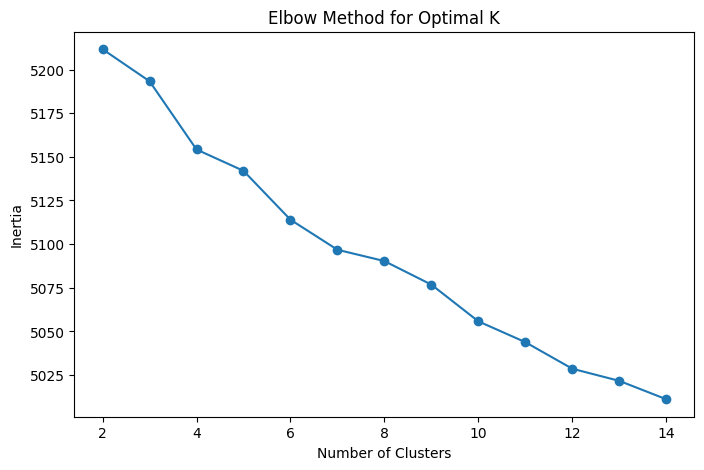

In [ ]:
#Use elbow method to find the best k value
inertia = []
k_values = range(2, 15)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(new_vectorized_docs)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
#Part A
num_clusters = 4
better_km = KMeans(n_clusters=num_clusters, init='random', n_init=10, random_state=42)
new_vectorized_docs = new_vectorizer.fit_transform(df['msg'])
df['better_cluster'] = better_km.fit_predict(new_vectorized_docs)


In [ ]:
print(better_km.labels_[2300])
print(better_km.labels_.shape)

3
(5304,)


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
def word_cloud(cluster_number):
  km_optimal_text = " ".join(df[df["better_cluster"] == cluster_number]["msg"])
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(km_optimal_text)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.title(f"Word Cloud for Cluster {cluster_number}")
  plt.show()

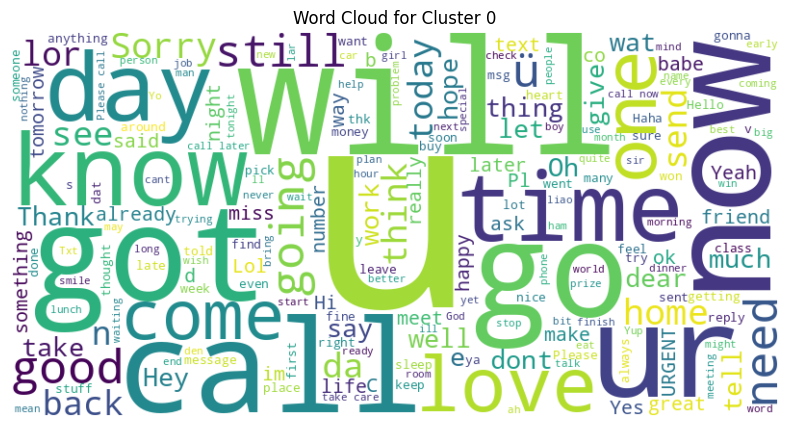

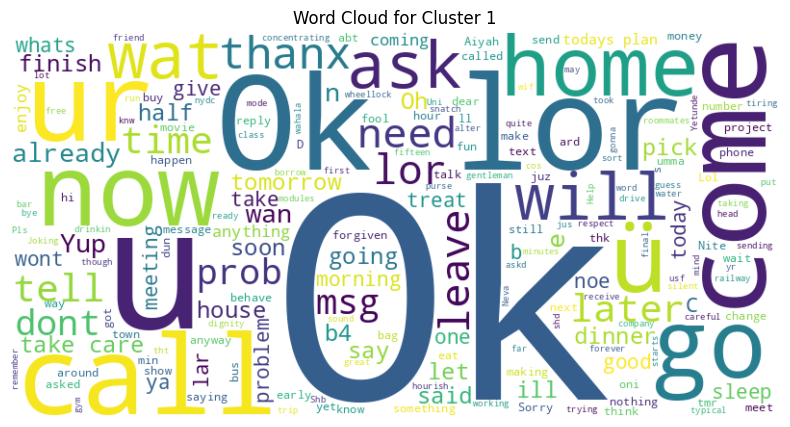

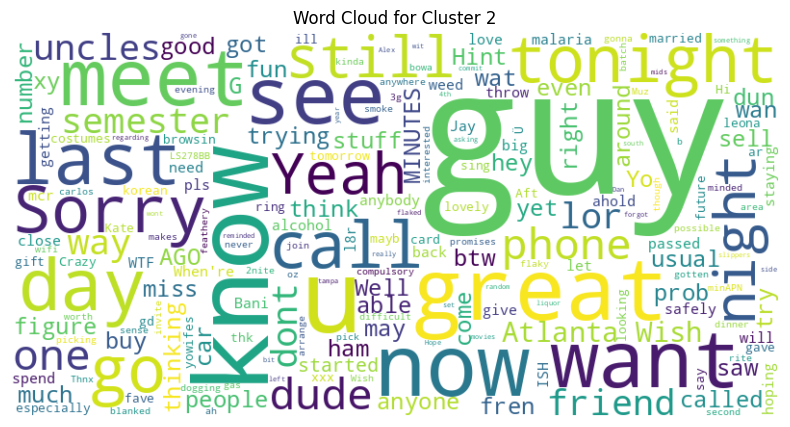

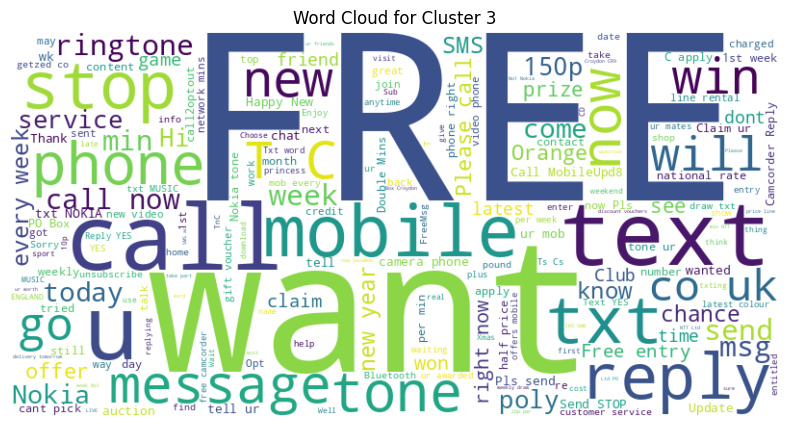

In [ ]:
for i in range(num_clusters):
  word_cloud(i)

In [ ]:
for cluster in range(num_clusters):
    cluster_data_subset = df[df["better_cluster"] == cluster]
    total_cluster_size = len(cluster_data_subset)
    spam_percentage = (cluster_data_subset['type'] == 'spam').mean() * 100
    print(f"Cluster {cluster}: Total Messages: {total_cluster_size}, {spam_percentage:.2f}% spam")
    print("Sample Messages:")
    # Sample a maximum of 3 messages or the available number of messages in the cluster, whichever is smaller
    sample_size = min(3, total_cluster_size)
    print(cluster_data_subset["msg"].sample(sample_size, replace=False).tolist())

Cluster 0: Total Messages: 4440, 7.61% spam
Sample Messages:
['Hi ....My engagement has been fixd on ###th of next month. I know its really shocking bt....hmm njan vilikkam....t ws al of a sudn;-(.', 'Jus chillaxin what up', 'Where u been hiding stranger?']
Cluster 1: Total Messages: 193, 0.00% spam
Sample Messages:
['Ok. is any problem to u frm him? Wats matter?', 'Ok set let u noe e details later...', 'Its ok chikku and its my 1 of favourite song..:-)']
Cluster 2: Total Messages: 52, 1.92% spam
Sample Messages:
['K makes sense btw carlos is being difficult so you guys are gonna smoke while I go pick up the second batch and get gas', "What's a feathery bowa? Is that something guys have that I don't know about?", 'Nothing smsing u n xy lor. Sorry lor da guys neva c u in person but they sort of know u lor. So u wan 2 meet them xy ask me 2 bring u along 4 our next meeting.']
Cluster 3: Total Messages: 619, 56.06% spam
Sample Messages:
['Congrats! 1 year special cinema pass for 2 is yours

In [ ]:
cluster_data = df[df["better_cluster"] == 0]
print(cluster_data['type']=="spam")

0       False
3       False
4       False
5        True
6       False
        ...  
5298    False
5300     True
5301    False
5302    False
5303    False
Name: type, Length: 4440, dtype: bool


In [ ]:
#Part B
for cluster in range(num_clusters):
  cluster_data = df[df["better_cluster"] == cluster]
  spam_data = cluster_data[cluster_data["type"] == "spam"]
  ham_data = cluster_data[cluster_data["type"] == "ham"]
  if not spam_data.empty:
      print(f"Spam message in a ham cluster {cluster}: {spam_data.iloc[0]['msg']}")
  if not ham_data.empty:
      print(f"Ham message in a spam cluster {cluster}: {ham_data.iloc[0]['msg']}")


Spam message in a ham cluster 0: FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send £1.50 to rcv
Ham message in a spam cluster 0: Go until jurong point crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ham message in a spam cluster 1: Ok lar... Joking wif u oni...
Spam message in a ham cluster 2: More people are dogging in your area now. Call 09090204448 and join like minded guys. Why not arrange 1 yourself. There's 1 this evening. A£1.50 minAPN LS278BB
Ham message in a spam cluster 2: He will you guys close?
Spam message in a ham cluster 3: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Ham message in a spam cluster 3: Wait that's still not all that clear were you not sure about me being sarcastic or that that's why x doesn't want to live with us


In [ ]:
#Part C
new_texts = ["Congratulations! You've won a free trial to CSCI 4521!","Hey, Are u going to go out today?","We should go swimming this weekend.", "I'm so excited for Tottenham game tonight!"
]

In [ ]:
#Checks if the new texts are in the train data
for text in new_texts:
    if text in df["msg"].values:
        print(f"Warning: The text '{text}' is already present in the training data")

new_text_messages_vec = new_vectorizer.transform(new_texts)

predicted_clusters = better_km.predict(new_text_messages_vec)

for msg, cluster in zip(new_texts, predicted_clusters):
    print(f"Message: {msg}\nPredicted Cluster: {cluster}\n")

Message: Congratulations! You've won a free trial to CSCI 4521!
Predicted Cluster: 3

Message: Hey, Are u going to go out today?
Predicted Cluster: 0

Message: We should go swimming this weekend.
Predicted Cluster: 0

Message: I'm so excited for Tottenham game tonight!
Predicted Cluster: 0



In [ ]:
#Distance between this new_text and the cluster center
print(better_km.cluster_centers_[predicted_clusters])

[[2.66494779e-03 9.19133235e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.60363453e-04 0.00000000e+00 6.72027227e-05 ... 5.46744019e-05
  5.22588752e-05 9.69711514e-05]
 [1.60363453e-04 0.00000000e+00 6.72027227e-05 ... 5.46744019e-05
  5.22588752e-05 9.69711514e-05]
 [1.60363453e-04 0.00000000e+00 6.72027227e-05 ... 5.46744019e-05
  5.22588752e-05 9.69711514e-05]]


In [ ]:
new_cluster_assignments = better_km.predict(new_text_messages_vec)

for text, cluster_assignment in zip(new_texts, new_cluster_assignments):
    cluster_neighbor_indices = (better_km.labels_ == cluster_assignment).nonzero()[0]

    print(f"Cluster neighbor indices for '{text}': {cluster_neighbor_indices[:10]}")

Cluster neighbor indices for 'Congratulations! You've won a free trial to CSCI 4521!': [ 2  9 11 12 28 32 38 40 54 73]
Cluster neighbor indices for 'Hey, Are u going to go out today?': [ 0  3  4  5  6  7  8 10 13 14]
Cluster neighbor indices for 'We should go swimming this weekend.': [ 0  3  4  5  6  7  8 10 13 14]
Cluster neighbor indices for 'I'm so excited for Tottenham game tonight!': [ 0  3  4  5  6  7  8 10 13 14]


In [ ]:
for i, text in enumerate(new_texts):
    print(f"Text Index: {i}")
    print(f"Predicted Cluster: {predicted_clusters[i]}")

    distances = [np.linalg.norm(new_text_messages_vec[i].toarray() - center)
                 for center in better_km.cluster_centers_]
    print(f"Distances to Cluster Centers: {distances}")
    print(f"Closest Cluster: {np.argmin(distances)}")
    print()

Text Index: 0
Predicted Cluster: 3
Distances to Cluster Centers: [0.9994686119320265, 1.1099880532271125, 1.0743730937419909, 0.989225854756]
Closest Cluster: 3

Text Index: 1
Predicted Cluster: 0
Distances to Cluster Centers: [0.9893046912605553, 1.1029484758409704, 1.0700575779631092, 1.0077371642645796]
Closest Cluster: 0

Text Index: 2
Predicted Cluster: 0
Distances to Cluster Centers: [1.0015484363776939, 1.1106333099077168, 1.0757019755529031, 1.0148410119409446]
Closest Cluster: 0

Text Index: 3
Predicted Cluster: 0
Distances to Cluster Centers: [1.0002396084973673, 1.1098229141679565, 1.0646476832760505, 1.0121875637699496]
Closest Cluster: 0



In [ ]:
print(df)

      type                                                msg  cluster  \
0      ham  Go until jurong point crazy.. Available only i...        1   
1      ham                      Ok lar... Joking wif u oni...        0   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        1   
3      ham  U dun say so early hor... U c already then say...        1   
4      ham  Nah I don't think he goes to usf he lives arou...        1   
...    ...                                                ...      ...   
5299  spam  REMINDER FROM O2: To get 2.50 pounds free call...        1   
5300  spam  This is the 2nd time we have tried 2 contact u...        1   
5301   ham               Will ü b going to esplanade fr home?        1   
5302   ham  Pity * was in mood for that. So...any other su...        1   
5303   ham                         Rofl. Its true to its name        1   

      type_numerical  predicted_label  better_cluster  
0                  1                0               0  

In [ ]:
#Question 3
import plotly.express as px
from sklearn.decomposition import PCA

In [ ]:
#Part A
pca = PCA(n_components=3)
X_pca = pca.fit_transform(new_vectorized_docs.toarray())
print(X_pca)
df['PCA1'], df['PCA2'], df['PCA3'] = X_pca[:, 0], X_pca[:, 1], X_pca[:, 2]

#3D Scatter Plot
fig = px.scatter_3d(df, x='PCA1', y='PCA2', z='PCA3', color='type', hover_data=['msg'])
fig.show()

[[-0.02011034 -0.02349852 -0.00273201]
 [ 0.26564732 -0.0154816  -0.03079002]
 [-0.0294116  -0.02192358 -0.05234346]
 ...
 [-0.00824007 -0.02340471  0.14905415]
 [-0.01656615 -0.01557515 -0.01519863]
 [-0.01857107 -0.01721535 -0.01336939]]


In [ ]:
#2D Scatter Plot
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]
df['PC3'] = X_pca[:, 2]

df['document_id'] = df.index
fig = px.scatter(df, x="PC1", y="PC2", color = "type",  hover_data=['document_id', 'msg'])
fig.show()

In [ ]:
#The outliers
if (df['document_id'] == 1554).any():
  print(df[df['document_id'] == 1554][['msg', 'document_id']])


                                                    msg  document_id
1554  500 free text msgs. Just text ok to 80488 and ...         1554


In [ ]:
pca_full = PCA().fit(new_vectorized_docs.toarray())

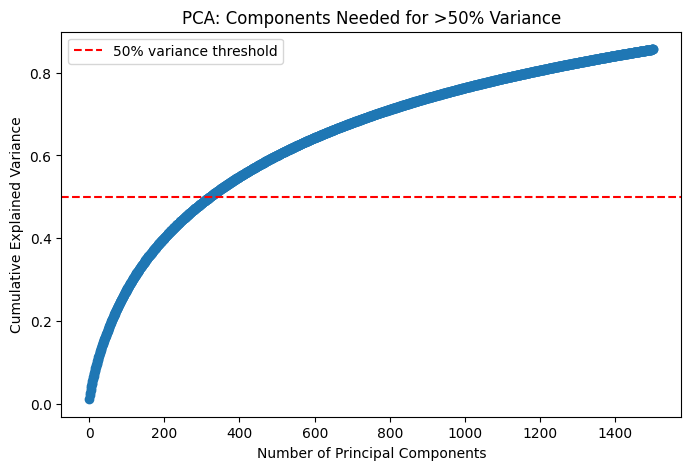

Number of PCA Components Needed to Capture >50% Variance: 322


In [ ]:
cumulative_variance_full = np.cumsum(pca_full.explained_variance_ratio_)
n_components_50 = np.argmax(cumulative_variance_full > 0.50) + 1

plt.figure(figsize=(8, 5))
x_data = range(1, min(len(cumulative_variance_full), 1500) + 1)
y_data = cumulative_variance_full[:len(x_data)]

plt.plot(x_data, y_data, marker='o')
plt.axhline(y=0.5, color='r', linestyle='--', label='50% variance threshold')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Components Needed for >50% Variance")
plt.legend()
plt.show()
print(f"Number of PCA Components Needed to Capture >50% Variance: {n_components_50}")

In [ ]:
cumulative_variance_full = np.cumsum(pca_full.explained_variance_ratio_)
n_components_50 = np.argmax(cumulative_variance_full > 0.50) + 1
print(f"Number of PCA Components Needed to Capture >50% Variance: {n_components_50}")

Number of PCA Components Needed to Capture >50% Variance: 322


In [ ]:
#Question 4
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Split data
X_train_nn_full, X_test_nn_full, y_train_nn_full, y_test_nn_full = train_test_split(new_vectorized_docs, df['type'], test_size=0.2, random_state=42)
X_train_nn_pca, X_test_nn_pca, y_train_nn_pca, y_test_nn_pca = train_test_split(X_pca, df['type'], test_size=0.2, random_state=42)

# Full Feature Space
knn_full_feature = KNeighborsClassifier(n_neighbors=1)

start_time_full = time.time()
knn_full_feature.fit(X_train_nn_full, y_train_nn_full)
y_pred_full_feature = knn_full_feature.predict(X_test_nn_full)
end_time_full = time.time()

# PCA Feature Space
knn_pca_feature = KNeighborsClassifier(n_neighbors=1)

start_time_pca = time.time()
knn_pca_feature.fit(X_train_nn_pca, y_train_nn_pca)
y_pred_pca_feature = knn_pca_feature.predict(X_test_nn_pca)
end_time_pca = time.time()

# Metrics and Runtime
print("NN Full Feature Space Metrics:")
print(f"Accuracy: {accuracy_score(y_test_nn_full, y_pred_full_feature):.4f}")
print(f"F1 Score: {f1_score(y_test_nn_full, y_pred_full_feature, pos_label='spam'):.4f}")
print(f"Runtime: {end_time_full - start_time_full:.4f} seconds")

print("\nNN PCA Feature Space Metrics:")
print(f"Accuracy: {accuracy_score(y_test_nn_pca, y_pred_pca_feature):.4f}")
print(f"F1 Score: {f1_score(y_test_nn_pca, y_pred_pca_feature, pos_label='spam'):.4f}")
print(f"Runtime: {end_time_pca - start_time_pca:.4f} seconds")


NN Full Feature Space Metrics:
Accuracy: 0.9491
F1 Score: 0.7731
Runtime: 0.0720 seconds

NN PCA Feature Space Metrics:
Accuracy: 0.9218
F1 Score: 0.7128
Runtime: 0.0796 seconds


In [ ]:
#Question 5
#Test Different n_neighbors Values
n_neighbors_values = range(1, 21)
accuracy_scores = []
f1_scores = []
X_train_nn_full, X_test_nn_full, y_train_nn_full, y_test_nn_full = train_test_split(new_vectorized_docs, df['type'], test_size=0.2, random_state=42)
X_train_nn_pca, X_test_nn_pca, y_train_nn_pca, y_test_nn_pca = train_test_split(X_pca, df['type'], test_size=0.2, random_state=42)

for n in n_neighbors_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=n)
    knn_classifier.fit(X_train_nn_pca, y_train_nn_pca)
    y_pred = knn_classifier.predict(X_test_nn_pca)
    accuracy_scores.append(accuracy_score(y_test_nn_pca, y_pred))
    f1_scores.append(f1_score(y_test_nn_pca, y_pred, pos_label='spam'))
    print(f"n_neighbors={n}: Accuracy={accuracy_scores[-1]:.4f}, F1 Score={f1_scores[-1]:.4f}")

n_neighbors=1: Accuracy=0.9218, F1 Score=0.7128
n_neighbors=2: Accuracy=0.9199, F1 Score=0.6414
n_neighbors=3: Accuracy=0.9246, F1 Score=0.7163
n_neighbors=4: Accuracy=0.9208, F1 Score=0.6613
n_neighbors=5: Accuracy=0.9227, F1 Score=0.6870
n_neighbors=6: Accuracy=0.9208, F1 Score=0.6585
n_neighbors=7: Accuracy=0.9218, F1 Score=0.6795
n_neighbors=8: Accuracy=0.9189, F1 Score=0.6532
n_neighbors=9: Accuracy=0.9218, F1 Score=0.6868
n_neighbors=10: Accuracy=0.9218, F1 Score=0.6770
n_neighbors=11: Accuracy=0.9255, F1 Score=0.7041
n_neighbors=12: Accuracy=0.9208, F1 Score=0.6719
n_neighbors=13: Accuracy=0.9227, F1 Score=0.6917
n_neighbors=14: Accuracy=0.9208, F1 Score=0.6693
n_neighbors=15: Accuracy=0.9189, F1 Score=0.6718
n_neighbors=16: Accuracy=0.9237, F1 Score=0.6824
n_neighbors=17: Accuracy=0.9274, F1 Score=0.7094
n_neighbors=18: Accuracy=0.9255, F1 Score=0.6950
n_neighbors=19: Accuracy=0.9274, F1 Score=0.7072
n_neighbors=20: Accuracy=0.9255, F1 Score=0.6950


In [ ]:
# Final KNN Classifier with Optimal n_neighbors
optimal_n = n_neighbors_values[np.argmax(accuracy_scores)]
knn_classifier = KNeighborsClassifier(n_neighbors=optimal_n)
knn_classifier.fit(X_train_nn_pca, y_train_nn_pca)
y_pred_final = knn_classifier.predict(X_test_nn_pca)

print("Final Spam Classifier Performance with Optimal k:")
print(f"Optimal n_neighbors: {optimal_n}")
print(f"Accuracy: {accuracy_score(y_test_nn_pca, y_pred_final):.4f}")
print(f"F1 Score: {f1_score(y_test_nn_pca, y_pred_final, pos_label='spam'):.4f}")

Final Spam Classifier Performance with Optimal k:
Optimal n_neighbors: 17
Accuracy: 0.9274
F1 Score: 0.7094


In [ ]:
stemmed_vectorizer = StemmedTfidfVectorizer(min_df=1,stop_words='english')
vectorizer_count = CountVectorizer(min_df = 1, stop_words='english', max_features=5000)
X_tfidf = stemmed_vectorizer.fit_transform(df['msg'])
X_count = vectorizer_count.fit_transform(df['msg'])

KNN with PCA + TF-IDF Performance:
Accuracy: 0.9152, F1 Score: 0.6617, Runtime: 0.0846 sec
KNN with PCA + CountVectorizer Performance:
Accuracy: 0.9566, F1 Score: 0.8321, Runtime: 0.0766 sec


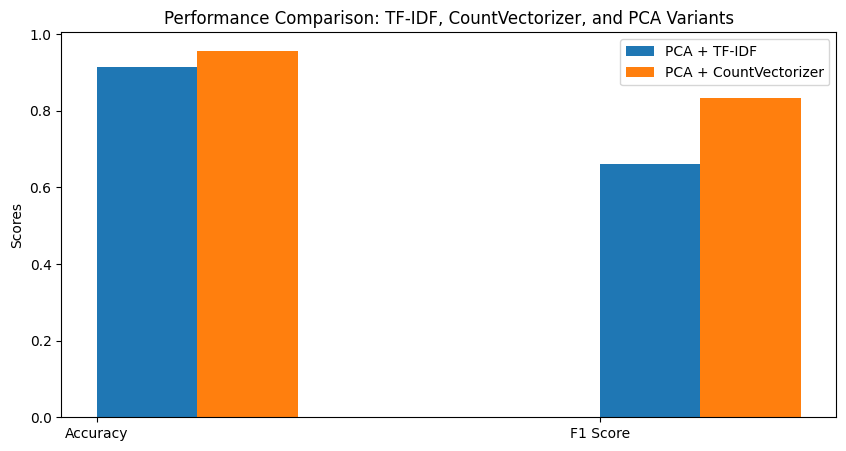

In [ ]:
X_pca_tfidf = pca.fit_transform(X_tfidf.toarray())
X_pca_count = pca.fit_transform(X_count.toarray())
X_train_pca_tfidf, X_test_pca_tfidf, y_train, y_test= train_test_split(X_pca_tfidf, df['type'], test_size=0.2, random_state=42)
X_train_pca_count, X_test_pca_count, y_train, y_test = train_test_split(X_pca_count, df['type'], test_size=0.2, random_state=42)
start_pca_tfidf = time.time()
knn_pca_tfidf = KNeighborsClassifier(n_neighbors=optimal_n)
knn_pca_tfidf.fit(X_train_pca_tfidf, y_train)
y_pred_pca_tfidf = knn_pca_tfidf.predict(X_test_pca_tfidf)
end_pca_tfidf = time.time()
pca_tfidf_runtime = end_pca_tfidf - start_pca_tfidf

start_pca_count = time.time()
knn_pca_count = KNeighborsClassifier(n_neighbors=optimal_n)
knn_pca_count.fit(X_train_pca_count, y_train)
y_pred_pca_count = knn_pca_count.predict(X_test_pca_count)
end_pca_count = time.time()
pca_count_runtime = end_pca_count - start_pca_count


accuracy_pca_tfidf = accuracy_score(y_test, y_pred_pca_tfidf)
f1_pca_tfidf = f1_score(y_test, y_pred_pca_tfidf, pos_label='spam')
accuracy_pca_count = accuracy_score(y_test, y_pred_pca_count)
f1_pca_count = f1_score(y_test, y_pred_pca_count, pos_label='spam')

print("KNN with PCA + TF-IDF Performance:")
print(f"Accuracy: {accuracy_pca_tfidf:.4f}, F1 Score: {f1_pca_tfidf:.4f}, Runtime: {pca_tfidf_runtime:.4f} sec")
print("KNN with PCA + CountVectorizer Performance:")
print(f"Accuracy: {accuracy_pca_count:.4f}, F1 Score: {f1_pca_count:.4f}, Runtime: {pca_count_runtime:.4f} sec")

labels = ['Accuracy', 'F1 Score']
pca_tfidf_scores = [accuracy_pca_tfidf, f1_pca_tfidf]
pca_count_scores = [accuracy_pca_count, f1_pca_count]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x + 0.5*width, pca_tfidf_scores, width, label='PCA + TF-IDF')
ax.bar(x + 1.5*width, pca_count_scores, width, label='PCA + CountVectorizer')

ax.set_ylabel('Scores')
ax.set_title('Performance Comparison: TF-IDF, CountVectorizer, and PCA Variants')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()